# Main Goals of Project
- Plot the distribution of tax rates for each county

In [44]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import numpy as np

from acquire import get_zillow_data

## Acquire

In [5]:
zillow = get_zillow_data()

In [6]:
zillow

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,parcelid.1,logerror,transactiondate
0,2061546,11289917,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,11289917,-0.362001,2017-06-23
1,1834372,11705026,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,2016.0,23624.0,543.69,NaN,NaN,6.037232e+13,1772,11705026,-0.146056,2017-06-30
2,1923117,14269464,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,2016.0,445569.0,9819.72,NaN,NaN,6.059064e+13,2028,14269464,0.021085,2017-06-01
3,2121349,11389003,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,2016.0,449000.0,7673.19,NaN,NaN,6.037703e+13,3273,11389003,-0.325393,2017-06-01
4,2093710,11967869,NaN,NaN,NaN,1.0,2.0,NaN,5.0,1.0,...,2016.0,191821.0,3267.47,NaN,NaN,6.037185e+13,3429,11967869,-0.005566,2017-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1324679,14339902,NaN,NaN,NaN,3.0,5.0,NaN,NaN,3.0,...,2016.0,57104.0,5718.72,NaN,NaN,6.059052e+13,53494,14339902,-0.033525,2017-06-30
15032,2963359,13940564,NaN,NaN,NaN,3.0,5.0,NaN,NaN,3.0,...,2016.0,27314.0,1465.88,NaN,NaN,6.059076e+13,53496,13940564,-0.004625,2017-06-30
15033,1948691,12945108,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,2016.0,171711.0,3519.78,NaN,NaN,6.037407e+13,53499,12945108,0.030079,2017-06-30
15034,444575,14214719,NaN,NaN,NaN,3.0,5.0,NaN,NaN,3.0,...,2016.0,407513.0,8065.50,NaN,NaN,6.059076e+13,53500,14214719,-0.017898,2017-06-30


## Prepare

Obtaining only the columns we need to figure out tax rate and county distributions

In [7]:
df = zillow[['taxamount', 'taxvaluedollarcnt', 'fips']]

Dropping null values

In [8]:
df = df.dropna()

Creating a new column called taxrates

In [10]:
df['taxrates'] = round((zillow.taxamount / zillow.taxvaluedollarcnt) * 100, 2)

Summary statistics based off of each county

In [12]:
df.groupby('fips').taxrates.describe().T

fips,6037.0,6059.0,6111.0
count,9629.000000,4109.000000,1297.00000
mean,1.417268,1.211957,1.20512
std,0.765991,0.321886,0.82701
min,0.110000,0.170000,0.08000
25%,1.210000,1.060000,1.07000
50%,1.260000,1.150000,1.12000
75%,1.440000,1.250000,1.19000
max,45.290000,10.740000,29.49000


Assigning county numbers to their respective name

In [13]:
los_angeles = df[df.fips == 6037].taxrates
orange = df[df.fips == 6059].taxrates
ventura = df[df.fips == 6111].taxrates

In [46]:
los_angeles.std()

0.7659910809091842

## Graph

Plotting all of the California counties distribution plots

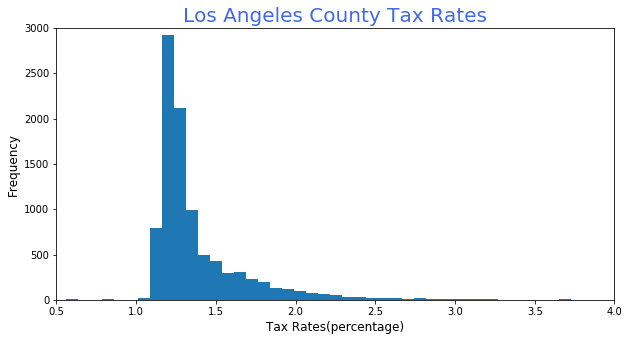

In [56]:
plt.figure(figsize=(10,5))
plt.hist(los_angeles, bins = 600)
plt.xlim(.5, 4)
plt.ylim(0, 3000)
plt.title('Los Angeles County Tax Rates', fontsize = 20, color = "royalblue")
plt.xlabel('Tax Rates(percentage)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

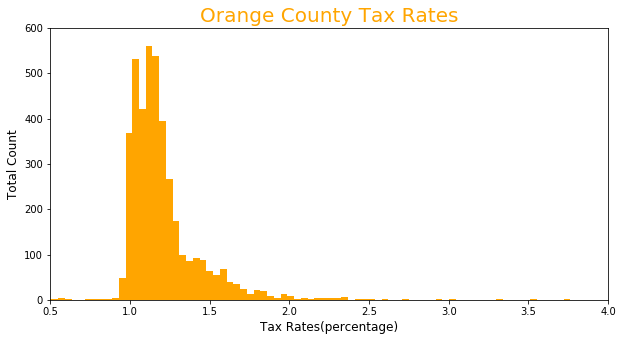

In [57]:
plt.figure(figsize=(10,5))
plt.hist(orange, bins = 250, color = "orange")
plt.xlim(.5, 4)
plt.ylim(0, 600)
plt.title('Orange County Tax Rates', fontsize = 20, color = "orange")
plt.xlabel('Tax Rates(percentage)', fontsize = 12)
plt.ylabel('Total Count', fontsize = 12)
plt.show()

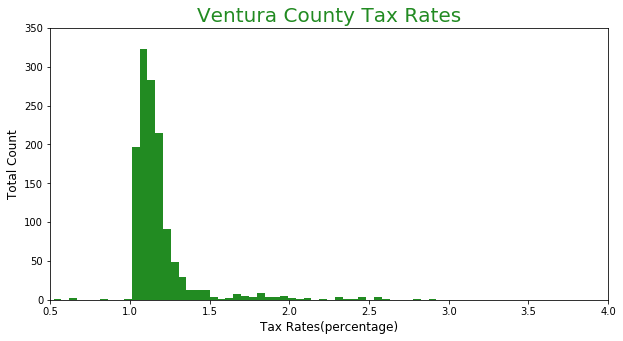

In [58]:
plt.figure(figsize=(10,5))
plt.hist(ventura, bins = 600, color = "forestgreen")
plt.xlim(.5, 4)
plt.ylim(0, 350)
plt.title('Ventura County Tax Rates', fontsize = 20, color = "forestgreen")
plt.xlabel('Tax Rates(percentage)', fontsize = 12)
plt.ylabel('Total Count', fontsize = 12)
plt.show()